#  🧗‍♂️ Climbing Stairs



Stai salendo una scala composta da **n** gradini. Ogni volta puoi salire **1 gradino** oppure **2 gradini** alla volta.

Quanti modi distinti ci sono per raggiungere la cima della scala?

## Esempi

**Esempio 1:**

```
Input: n = 2  
Output: 2
```

**Spiegazione:**
- 1 gradino + 1 gradino
- 2 gradini

**Esempio 2:**

```
Input: n = 3  
Output: 3
```

**Spiegazione:**
- 1 + 1 + 1
- 1 + 2
- 2 + 1

## Vincoli

- `1 <= n <= 45`


ways(n) = ways(n-1) + ways(n-2)

In [ ]:
def climbstairs(n):
    if n <= 2:
        return n

    first, second = 1,2

    #calcolo iterativo dal 3 gradino in poi fino all'n-esimo gradino

    for _ in range(3, n+1):
      first, second = second, first + second

    return second

In [ ]:
print(climbstairs(2)) #output 2
print(climbstairs(100)) #output 3


2
573147844013817084101


In [ ]:
def climbstairs2(n):
  memo = {} #dizionario per memorizzare i risultati dei sottoproblemi

  #funzione ricorsiva che calcola i modi per salire

  def climb(i):

    if i == n: #se siamo esattamente al gradino
      return 1

    if i>n: #se abbiamo superato il gradino
      return 0

    if i in memo:
      return memo[i]

    #calcolo ricorsivo
    memo[i] = climb(i+1) + climb(i+2)

    return memo[i]

  return climb(0)


In [ ]:
print(climbstairs2(2)) #output 2
print(climbstairs2(100)) #output 3

2
573147844013817084101


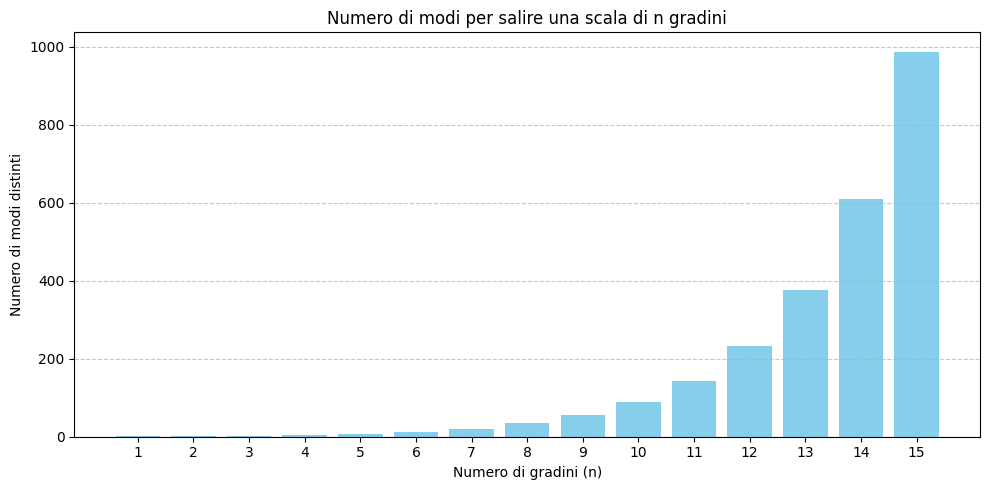

In [ ]:
import matplotlib.pyplot as plt

def climb_stairs(n):
    if n <= 2:
        return n
    first, second = 1, 2
    for _ in range(3, n + 1):
        first, second = second, first + second
    return second

n_values = list(range(1, 16))
ways = [climb_stairs(n) for n in n_values]

plt.figure(figsize=(10, 5))
plt.bar(n_values, ways, color='skyblue')
plt.title('Numero di modi per salire una scala di n gradini')
plt.xlabel('Numero di gradini (n)')
plt.ylabel('Numero di modi distinti')
plt.xticks(n_values)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

# 🔢 Count Numbers with Unique Digits

## 📋 Descrizione

Dato un intero `n`, restituisci il **numero totale** di tutti i numeri `x` tali che:

- `0 <= x < 10^n`  
- Tutte le cifre del numero `x` siano **diverse** (non ripetute)

---

## ✏️ Esempi

**Esempio 1:**

```
Input: n = 2
Output: 91
```

**Spiegazione:**  
Ci sono 100 numeri nell'intervallo `0 ≤ x < 100`.  
Escludendo i numeri con cifre ripetute (come 11, 22, 33, ..., 99), restano **91 numeri con cifre uniche**.

---

**Esempio 2:**

```
Input: n = 0
Output: 1
```

**Spiegazione:**  
Quando `n = 0`, c'è **solo un numero valido**: `0`.

---

## 🔒 Vincoli

- 0 <= n <= 8

count(k) = 9*(9)*8*7..(11-k)
n = 2
numeri con 1 cifra = 9
numeri con 2 cifre = 9*9 = 81
totale = 9+81 = 91

## programazione dinamica bottom up

In [ ]:
def count_numbers(n):

  #caso banale
  if n == 0:
    return 1

  total = 10 #per n>= 1 ci sono solamente 10 numeri con una sola cifra
  current = 9 #le cifre successive, inizano con 9 possibilità per la prima cifra

  for i in range(2, n+1):
    #per ogni successiva alla prima, moltiplichiamo per le possibili cifre restanti non uscite
    current = current * (11-i) # per i = 2, current = 9*9
    total += current

  return total

In [ ]:
print(count_numbers(0)) #1
print(count_numbers(1)) #10
print(count_numbers(2)) #91
print(count_numbers(3)) #739
print(count_numbers(50))


1
10
91
739
8877691


# 🏦 Good Days to Rob the Bank – Programmazione su array


## 📋 Descrizione

Tu e una banda di ladri state pianificando una rapina in banca. Ti viene dato un array di interi `security`, indicizzato a partire da 0, dove `security[i]` rappresenta il **numero di guardie** in servizio nel giorno `i`.

Ti viene inoltre dato un intero `time`.

Un giorno `i` è considerato un **buon giorno per rapinare la banca** se:

1. Esistono **almeno `time` giorni prima e dopo** il giorno `i`;
2. Il numero di guardie nei `time` giorni precedenti `i` è **non crescente** (cioè ogni giorno ha guardie in numero uguale o minore rispetto al giorno precedente);
3. Il numero di guardie nei `time` giorni successivi `i` è **non decrescente** (cioè ogni giorno ha guardie in numero uguale o maggiore rispetto al giorno precedente).

### 💡 Più formalmente:

Il giorno `i` è valido se e solo se:

```
security[i - time] >= security[i - time + 1] >= ... >= security[i] <= ... <= security[i + time - 1] <= security[i + time]
```

---

## 🎯 Obiettivo

Restituisci un array contenente **tutti i giorni** (indicizzati da 0) che rappresentano **buoni giorni per rapinare la banca**.

L’ordine dei giorni nell’output **non è importante**.

---

## ✏️ Esempi

**Esempio 1:**

```
Input: security = [5, 3, 3, 3, 5, 6, 2], time = 2
Output: [2, 3]
```

**Spiegazione:**
- Giorno 2: security[0] >= security[1] >= security[2] <= security[3] <= security[4]
- Giorno 3: security[1] >= security[2] >= security[3] <= security[4] <= security[5]
- Nessun altro giorno soddisfa i criteri.

---

**Esempio 2:**

```
Input: security = [1, 1, 1, 1, 1], time = 0
Output: [0, 1, 2, 3, 4]
```

**Spiegazione:**
Quando `time = 0`, **tutti i giorni** sono validi.

---

**Esempio 3:**

```
Input: security = [1, 2, 3, 4, 5, 6], time = 2
Output: []
```

**Spiegazione:**
Non ci sono 2 giorni precedenti con guardie non crescenti per nessun giorno, quindi il risultato è una lista vuota.

---

## 🔒 Vincoli

- 1 <= security.length <= 10^5  
- 0 <= security[i], time <= 10^5


In [ ]:
def good_days(security,time):
  n = len(security)

  #caso banale
  if time == 0:
    return list(range(n))

  #array per contare i giorni consecutivi prima di i, decrescenti
  non_crescenti = [0]* n
  #array per contare i giorni consecutivi dopo di i, crescenti
  non_decrescenti = [0]* n

  #costruire l'array dei giorni non crescenti da sinistra a dx

  for i in range(1,n):
    if security[i] <= security[i-1]:
      non_crescenti[i] = non_crescenti[i-1]+1

  for i in range(n-2, -1, -1):
    if security[i] <= security[i+1]:
      non_decrescenti[i] = non_decrescenti[i+1]+1

  #identifica i giorni buoni

  result = []

  for i in range(time, n-time):
    if non_crescenti[i] >= time and non_decrescenti[i]>= time:
      result.append(i)


  return result

In [ ]:
print(good_days([5,3,3,3,5,6,2],2)) #[2,3]
print(good_days([1,1,1,1,1],0)) #[0,1,2,3,4]
print(good_days([1,2,3,4,5,6],2)) #[]
print(good_days([7,6,2,4,74,5,49,8,2,1,59,56,2,6,3,2,8,9,66,9,87],2)) #[]


[2, 3]
[0, 1, 2, 3, 4]
[]
[2, 15]


# 🔺 Successione di Tribonacci



## 📋 Descrizione

La successione di **Tribonacci** `Tₙ` è definita nel seguente modo:

```
T₀ = 0  
T₁ = 1  
T₂ = 1  
Tₙ₊₃ = Tₙ + Tₙ₊₁ + Tₙ₊₂    per n ≥ 0
```

Dato un intero `n`, restituisci il valore di `Tₙ`.

---

## ✏️ Esempi

**Esempio 1:**

```
Input: n = 4
Output: 4
```

**Spiegazione:**

```
T₃ = 0 + 1 + 1 = 2  
T₄ = 1 + 1 + 2 = 4
```

---

**Esempio 2:**

```
Input: n = 25
Output: 1389537
```

---

## 🔒 Vincoli

- 0 ≤ n ≤ 37  
- La risposta è garantita per rientrare in un intero con segno a 32 bit, ovvero: `answer ≤ 2³¹ − 1`


#soluzione ricorsiva

In [ ]:
def trib(n):
  if n==  0:
    return 0
  elif n==1 or n==2:
    return 1


  return trib(n-1) + trib(n-2) + trib(n-3)

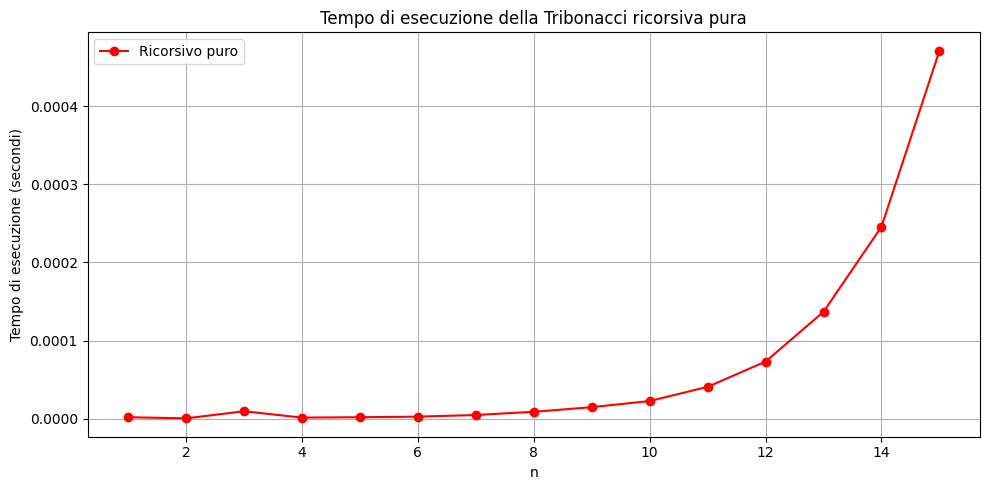

In [ ]:
import time
import matplotlib.pyplot as plt

recursive_time = []
n_valori = list(range(1,30))

for n in n_values:
  start = time.time()
  trib(n)
  end = time.time()
  recursive_time.append(end-start)

plt.figure(figsize=(10,5))
plt.plot(n_values, recursive_time, marker='o', color='red', label='Ricorsivo puro')
plt.xlabel('n')
plt.ylabel('Tempo di esecuzione (secondi)')
plt.title('Tempo di esecuzione della Tribonacci ricorsiva pura')
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()

## soluzione bottom-up

In [ ]:
def tribonacci(n):

  if n == 0:
    return 0
  elif n == 1 or n==2:
    return 1

  a,b,c = 0,1,1

  for i in range(3, n+1):
    a,b,c = b,c,a+b+c

  return c

In [ ]:
print(tribonacci(50))

5742568741225


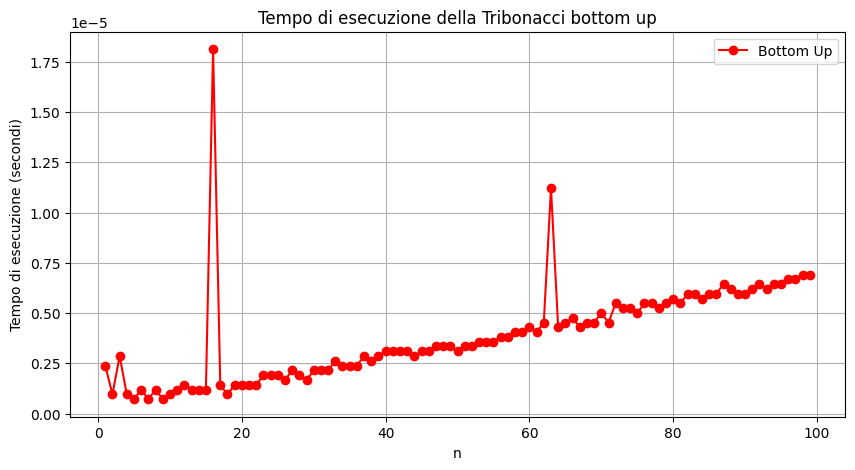

In [ ]:
import time
import matplotlib.pyplot as plt

recursive_time = []
n_valori = list(range(1,100))

for n in n_valori:
  start = time.time()
  tribonacci(n)
  end = time.time()
  recursive_time.append(end-start)

plt.figure(figsize=(10,5))
plt.plot(n_valori, recursive_time, marker='o', color='red', label='Bottom Up')
plt.xlabel('n')
plt.ylabel('Tempo di esecuzione (secondi)')
plt.title('Tempo di esecuzione della Tribonacci bottom up')
plt.grid(True)
plt.legend()


## soluzione top-down memoizzazione

In [ ]:
def tribonacci2(n , memo = {}):
  memo = {} #creiamo qua il dizionario

  if n == 0:
    return 0
  elif n == 1 or n==2:
    return 1

  if n in memo:
    return memo[n]

  result = tribonacci2(n-1, memo) +tribonacci2(n-2, memo) +tribonacci2(n-3, memo)

  memo[n] = result

  return result


In [ ]:
print(tribonacci(30))
print(tribonacci2(30))
print(trib(30))

29249425
29249425
29249425


## **differenza nel tempo di esecuzione**